We are going to approach a churn predication problem on Kaggle.
As an example, we will use the data from this competition.
we have created a few classification models first and then improved the algorithm parameter.

## Cover all Classification Algorithm
* LogisticRegression
* XGBClassifier
* KNeighborsClassifier
* GradientBoostingClassifier
* DecisionTreeClassifier

## Road Map 
* Library for Preprocessing and Cleaning
* Load all Classification Packages and Accuracy Packages
* Load Data Set
* Analyse the Data 
* LabelEncoder
* Split the Data Train and Validation
* Train Model and Check Validation Data Accuracy

### Library for Preprocessing and Cleaning

In [2]:
import numpy as np
import pandas as pd

import os

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import matplotlib as mlp
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns

### Load all Classification Packages and Accuracy Packages

In [3]:
import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,roc_auc_score

### The Importance of Predicting Customer Churn

The ability to predict that a particular customer is at a high risk of churning, while there is still time to do something about it, represents a huge additional potential revenue source for every online business. Besides the direct loss of revenue that results from a customer abandoning the business, the costs of initially acquiring that customer may not have already been covered by the customer’s spending to date. (In other words, acquiring that customer may have actually been a losing investment.) Furthermore, it is always more difficult and expensive to acquire a new customer than it is to retain a current paying customer.

### Load Data set

In [4]:
df = pd.read_csv('DMA_dataset.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


###  Remove Column 'phone number'

In [5]:
df = df.drop(['phone number'],axis=1)
df.shape

(3333, 20)

In [6]:
df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
print("------  Data Types  ----- \n",df.dtypes)
print("------  Data type Count  ----- \n",df.dtypes.value_counts())

------  Data Types  ----- 
 state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
------  Data type Count  ----- 
 int64      8
float64    8
object     3
bool       1
dtype: int64


## Churn Analysis

<AxesSubplot:>

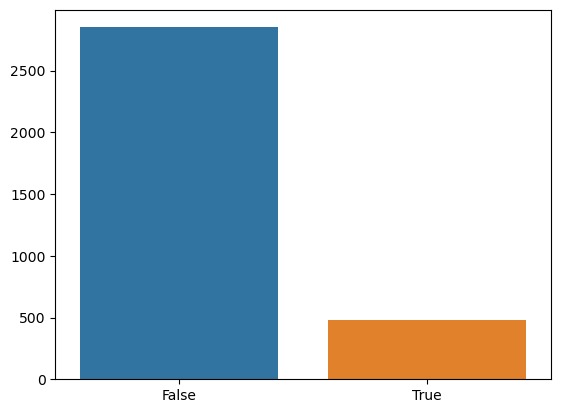

In [8]:
y = df["churn"].value_counts()

sns.barplot(y.index, y.values)

In [9]:
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

print("Imbalanced data - Lesser datapoints in True Churn category")

Churn Percentage = 14.491449144914492
Imbalanced data - Lesser datapoints in True Churn category


## Descriptive Analyis

In [10]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Churn by state

<AxesSubplot:xlabel='state'>

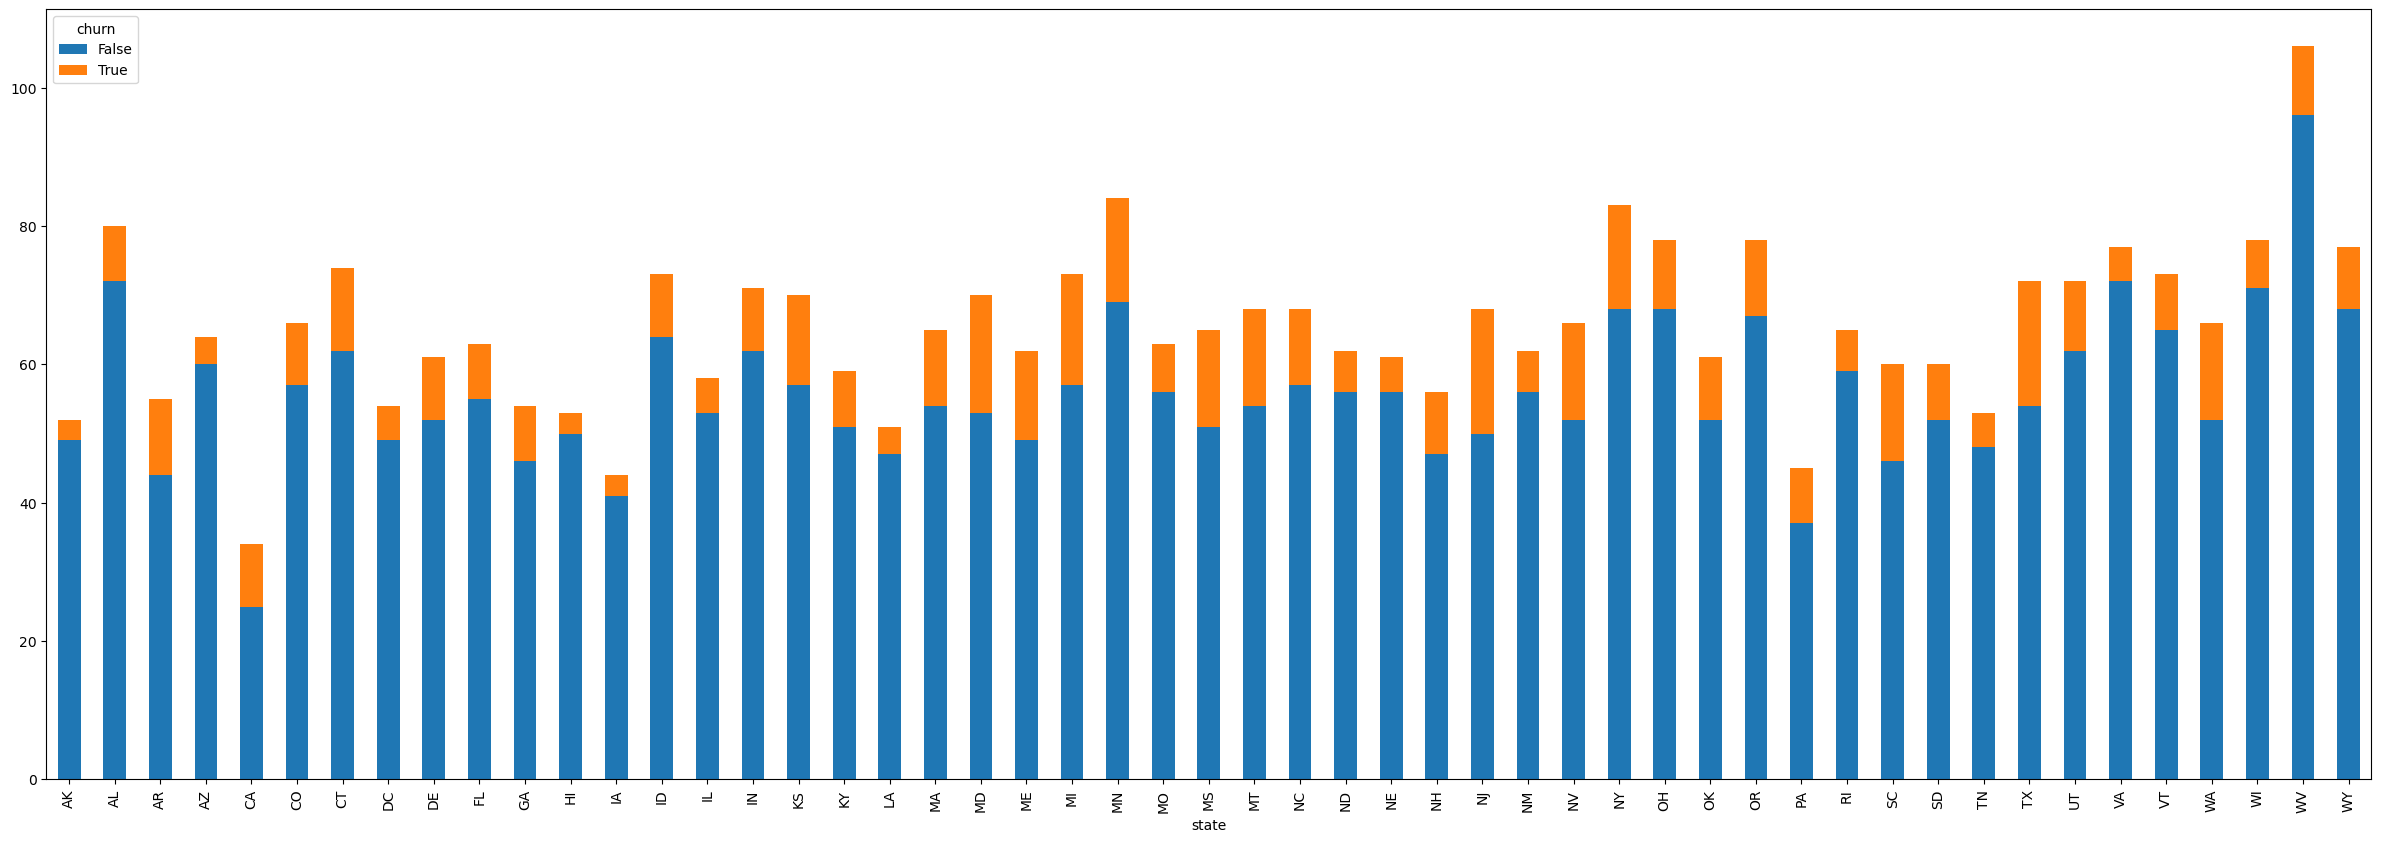

In [11]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

#### Churn by Area code

<AxesSubplot:xlabel='area code'>

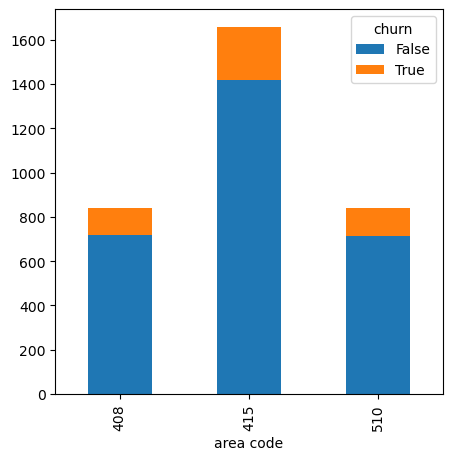

In [12]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

#### Churn By Customers with International plan

<AxesSubplot:xlabel='international plan'>

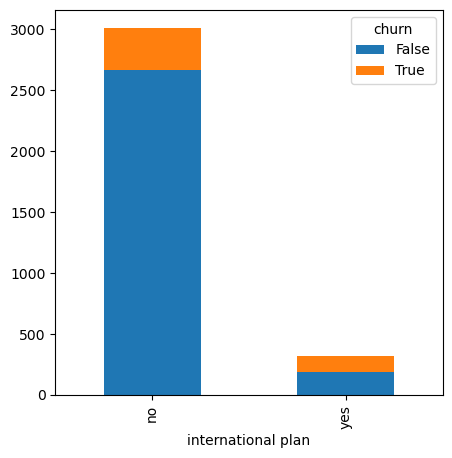

In [13]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

#### Churn By Customers with Voice mail plan

<AxesSubplot:xlabel='voice mail plan'>

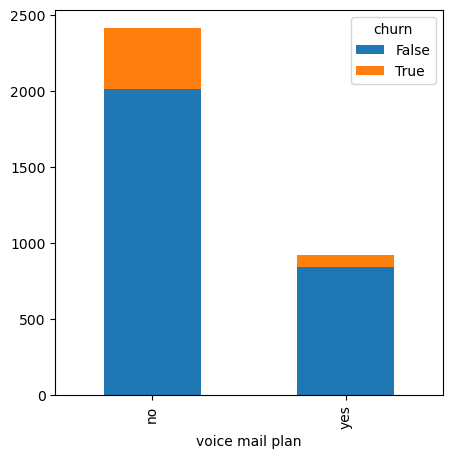

In [14]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

### Label Encoding for Catergorical Variable

In [15]:
cate = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['bool', 'object']]

In [16]:
le = preprocessing.LabelEncoder()
for i in cate:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    

### Correlation Plot

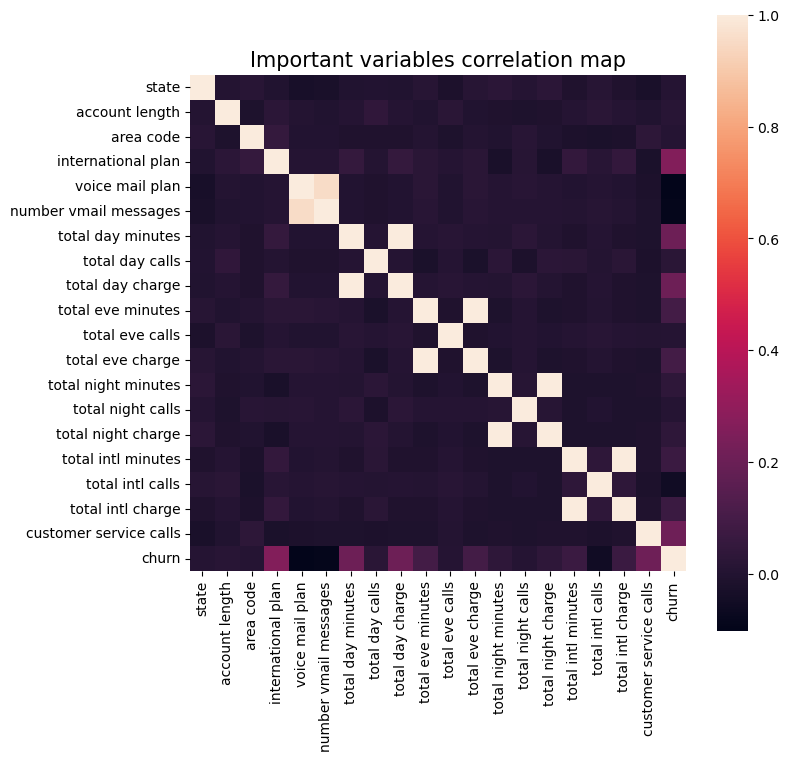

In [17]:
corrmat = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [19]:
y = df['churn']
df = df = df.drop(['churn'],axis=1)

### Feature Important by XGB

using XGBClassifier we get great accurcy so we have to take an insight of any one feature

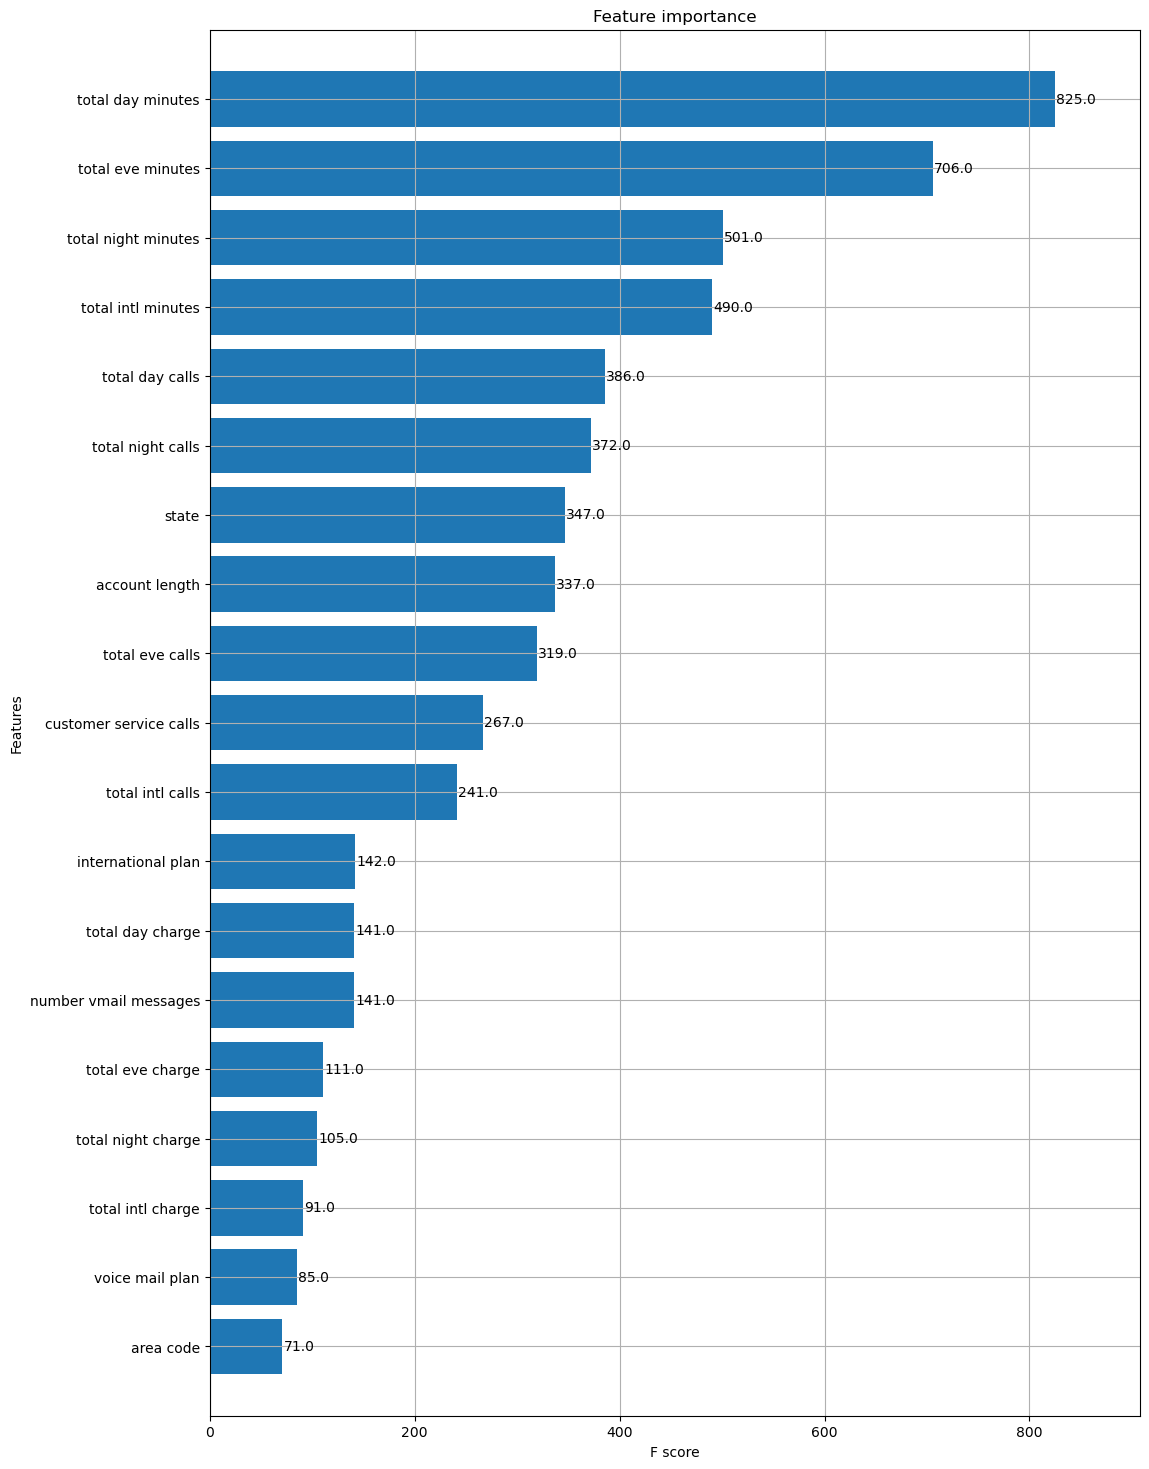

In [20]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(df, y)

fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

### Split Train and Validation Dataset

In [21]:
xtrain, xvalid, ytrain, yvalid = train_test_split(df, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [22]:
print(xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape)

(2999, 19) (334, 19) (2999,) (334,)


### Cover all Classification Algorithm
* LogisticRegression
* XGBClassifier
* KNeighborsClassifier
* GradientBoostingClassifier
* DecisionTreeClassifier 

### LogisticRegression

In [23]:
clf = LogisticRegression(C=1.0)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
lr = ['LogisticRegression',accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8323353293413174
auc 0.5033508158508159


In [24]:
algo = pd.DataFrame(columns= ["Classifier", "Accuracy", "Area under the curve"])
lr = pd.Series(lr, index = algo.columns)
algo = algo.append(lr, ignore_index=True)

### XGBClassifier

In [25]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
xg = ['XGB',accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.9461077844311377
auc 0.8471736596736598


In [26]:
xg = pd.Series(xg, index = algo.columns)
algo = algo.append(xg, ignore_index=True)

### KNeighborsClassifier

In [27]:
clf = KNeighborsClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
knc = ['KNeighbors',accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8802395209580839
auc 0.6440122377622378


In [28]:
knc = pd.Series(knc, index = algo.columns)
algo = algo.append(knc, ignore_index=True)

### GradientBoostingClassifier

In [29]:
clf = GradientBoostingClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
gbc = ['GradientBoosting',accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.9431137724550899
auc 0.845425407925408


In [30]:
gbc = pd.Series(gbc, index = algo.columns)
algo = algo.append(gbc, ignore_index=True)

### DecisionTreeClassifier

In [31]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
dtc = ['DecisionTree',accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.874251497005988
auc 0.7445367132867132


In [32]:
dtc = pd.Series(dtc, index = algo.columns)
algo = algo.append(dtc, ignore_index=True)
algo

,Classifier,Accuracy,Area under the curve
0,LogisticRegression,0.832335,0.503351
1,XGB,0.946108,0.847174
2,KNeighbors,0.880240,0.644012
3,GradientBoosting,0.943114,0.845425
4,DecisionTree,0.874251,0.744537


#### Graph for all the classifiers


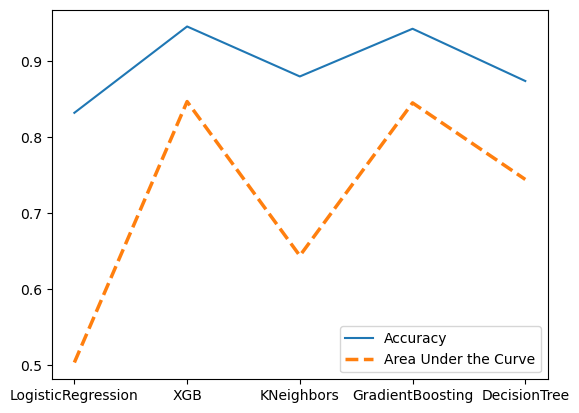

In [33]:
algo['Accuracy'].plot(legend = True, label = 'Accuracy')
algo['Area under the curve'].plot(legend = True, label = 'Area Under the Curve', style = '--', linewidth = 2.5)

plt.xticks(algo.index, algo['Classifier'].values)
plt.show()